In [1]:
# @hidden
import numpy as np
from numpy import argsort
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import os
import math
import pickle
import joblib
from itertools import chain
import glob
import seaborn as sns
import matplotlib.font_manager as font_manager
import seaborn as sns
import matplotlib as mpl
from pytorch_tabnet.tab_model import TabNetRegressor
import torch
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.utils import shuffle
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import RandomizedSearchCV
from collections import Counter
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from sklearn.model_selection import GridSearchCV
from pandas import read_csv
from datetime import datetime
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings('ignore')
register_matplotlib_converters()
sns.set_theme()
mpl.matplotlib_fname()
font_dirs = ['D:\\Software\\Anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf' ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
mpl.font_manager._rebuild()
result = font_manager.findfont("Rounded Mplus 1c")
print(result)
mpl.rc('font', family='Rounded Mplus 1c')


le = LabelEncoder()
ss = StandardScaler()
mms = MinMaxScaler()

D:\Software\Anaconda\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\MPLUSRounded1c-Regular.ttf


In [5]:
names = [
#          "Gradient_Boosting", 
#          "Decision_Tree", 
         "Extra_Trees", 
         "Random_Forest",
#          "XGBoost",
#          "LGBMRegressor"
]
models = [
#     GradientBoostingRegressor(),
#     DecisionTreeRegressor(max_depth=5),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
#     XGBRegressor(),
#     LGBMRegressor()
]

In [2]:
df =  pd.read_csv("Kaiho_Sell_2009-2022.csv", index_col= False)
df.columns

Index(['Vị trí_ロケーション', 'Ngày bán hàng_売上日', 'Tháng bán hàng_売上月',
       'Năm bán hàng_売上年', 'Ngày nhập_入力日', 'Đầu vào tháng_入力月',
       'Năm đầu vào_入力年', 'Bộ phận bán hàng_売上部門', 'Người bán hàng_売上担当',
       'Phân loại bán hàng_売上分類', 'Mã đích bán hàng_売上先コード',
       'Tên khách hàng_売上先名', 'Số nhập kho_入庫番号', 'Mã loại phụ tùng_商品コード',
       'Tên phụ tùng_商品名', 'Nhà sản xuất_メーカー', 'Tên xe_車名', 'Model xe_車輌型式',
       'Engine model_エンジン型式', 'Số lượng_数量', 'Đơn giá bán hàng_売上単価',
       'Sản lượng bán ra_売上金額', 'Đơn giá mua_仕入単価', 'Tổng giá nhập_仕入合計',
       'Tiền công_工賃', 'Chi phí_経費', 'Nguồn nhập hàng_仕入先',
       'Bộ phận mua hàng_仕入部門', 'Nhân viên thu mua_仕入担当',
       'Phụ trách sản xuất_生産担当', 'Truyền động 1_駆動1', 'TM_TM',
       'Truyền động 2_駆動2', 'Chi tiết_詳細', 'Phí tái chế_リサイクル料',
       'Số km đã chạy_走行距離', 'Năm sản xuất_年式',
       'Phân loại mang đến/đón_持込・引取区分', 'Tình trạng engine_エンジン状態',
       'Đã gửi tiền_預託済', 'Loại xe_車種', 'Đang tải nguồn_積込元',
       'C

In [83]:
df_mean_in_price_hybrid  = df.groupby(['Tên phụ tùng_商品名','Model xe_車輌型式','Engine model_エンジン型式'])['Đơn giá mua_仕入単価'].mean().reset_index(name = 'mean_in_price')
df_mean_in_price_model = df.groupby(['Tên phụ tùng_商品名','Model xe_車輌型式'])['Đơn giá mua_仕入単価'].mean().reset_index(name = 'mean_in_price')
df_mean_in_price_engine  = df.groupby(['Tên phụ tùng_商品名','Engine model_エンジン型式'])['Đơn giá mua_仕入単価'].mean().reset_index(name = 'mean_in_price')

df_mean_in_price_hybrid.to_csv('mean_data_all/hybrid_mean_in_price.csv',index=False)
df_mean_in_price_model.to_csv('mean_data_all/model_mean_in_price.csv',index = False)
df_mean_in_price_engine.to_csv('mean_data_all/engine_mean_in_price.csv',index = False)

In [84]:
df_median_in_price_hybrid  = df.groupby(['Tên phụ tùng_商品名','Model xe_車輌型式','Engine model_エンジン型式'])['Đơn giá mua_仕入単価'].median().reset_index(name = 'median_in_price')
df_median_in_price_model = df.groupby(['Tên phụ tùng_商品名','Model xe_車輌型式'])['Đơn giá mua_仕入単価'].median().reset_index(name = 'median_in_price')
df_median_in_price_engine  = df.groupby(['Tên phụ tùng_商品名','Engine model_エンジン型式'])['Đơn giá mua_仕入単価'].median().reset_index(name = 'median_in_price')

df_median_in_price_hybrid.to_csv('median_data_all/hybrid_in_price_median.csv',index=False)
df_median_in_price_model.to_csv('median_data_all/model_in_price_median.csv',index = False)
df_median_in_price_engine.to_csv('median_data_all/engine_in_price_median.csv',index = False)

In [85]:
df_add_feat_hybrid = pd.read_csv('data_training_all/add_feat_mean_median_hybrid_shift_one_month.csv',index_col=False)
df_add_feat_model = pd.read_csv('data_training_all/add_feat_mean_median_model_shift_one_month.csv',index_col=False)
df_add_feat_engine = pd.read_csv('data_training_all/add_feat_mean_median_engine_shift_one_month.csv',index_col=False)

In [86]:
a = pd.merge(df_add_feat_hybrid, df_mean_in_price_hybrid, on = ['Tên phụ tùng_商品名','Model xe_車輌型式','Engine model_エンジン型式'], how = 'left')
df_add_feat_hybrid = pd.merge(a, df_median_in_price_hybrid,on =  ['Tên phụ tùng_商品名','Model xe_車輌型式','Engine model_エンジン型式'], how = 'left' )

b = pd.merge(df_add_feat_engine,df_mean_in_price_engine, on = ['Tên phụ tùng_商品名','Engine model_エンジン型式'], how = 'left')
df_add_feat_engine = pd.merge(b, df_mean_in_price_engine,on =  ['Tên phụ tùng_商品名','Engine model_エンジン型式'], how = 'left' )

c = pd.merge(df_add_feat_model,df_mean_in_price_model, on = ['Tên phụ tùng_商品名','Model xe_車輌型式'], how = 'left')
df_add_feat_model = pd.merge(b, df_median_in_price_model,on =  ['Tên phụ tùng_商品名','Model xe_車輌型式'], how = 'left' )

In [87]:
df_add_feat_hybrid.columns

Index(['Vị trí_ロケーション', 'Ngày bán hàng_売上日', 'Tháng bán hàng_売上月',
       'Năm bán hàng_売上年', 'Ngày nhập_入力日', 'Đầu vào tháng_入力月',
       'Năm đầu vào_入力年', 'Bộ phận bán hàng_売上部門', 'Người bán hàng_売上担当',
       'Phân loại bán hàng_売上分類', 'Mã đích bán hàng_売上先コード',
       'Tên khách hàng_売上先名', 'Số nhập kho_入庫番号', 'Mã loại phụ tùng_商品コード',
       'Tên phụ tùng_商品名', 'Nhà sản xuất_メーカー', 'Tên xe_車名', 'Model xe_車輌型式',
       'Engine model_エンジン型式', 'Số lượng_数量', 'Đơn giá bán hàng_売上単価',
       'Sản lượng bán ra_売上金額', 'Đơn giá mua_仕入単価', 'Tổng giá nhập_仕入合計',
       'Tiền công_工賃', 'Chi phí_経費', 'Nguồn nhập hàng_仕入先',
       'Bộ phận mua hàng_仕入部門', 'Nhân viên thu mua_仕入担当',
       'Phụ trách sản xuất_生産担当', 'Truyền động 1_駆動1', 'TM_TM',
       'Truyền động 2_駆動2', 'Chi tiết_詳細', 'Phí tái chế_リサイクル料',
       'Số km đã chạy_走行距離', 'Năm sản xuất_年式',
       'Phân loại mang đến/đón_持込・引取区分', 'Tình trạng engine_エンジン状態',
       'Đã gửi tiền_預託済', 'Loại xe_車種', 'Đang tải nguồn_積込元',
       'C

In [155]:
list_feature = [
                'Tên phụ tùng_商品名',
                'Model xe_車輌型式',
                'Engine model_エンジン型式',
                'Tên xe_車名',
                'Nhà sản xuất_メーカー',
                'Đơn giá bán hàng_売上単価',
                'Quốc gia_国',
#                 'Tổng giá nhập_仕入合計',
#                 'Đơn giá mua_仕入単価',
                'Tháng bán hàng_売上月',
#                  'mean',
#                  'mean_auction',
#                  'median',
#                  'median_auction',
                 'mean_in_price',
                 'median_in_price',
                 'Iron',
                 'Harness',
                 'Alumi',
                 'New_York_Gas_Price',
                 'US_Gulf_Gas_Price',
                 'Năm bán hàng_売上年',
               ]

In [156]:
list_best_acc = ['エンジン','ＣＫＤ／コンプリート','ノーズカット（個別）','Ｒアクスル（生/Ｄ']

In [170]:
df_best_acc =  df_add_feat_hybrid[df_add_feat_hybrid.apply(lambda x: x['Tên phụ tùng_商品名'] in list_best_acc, axis=1)]
df_best_acc

,Vị trí_ロケーション,Ngày bán hàng_売上日,Tháng bán hàng_売上月,Năm bán hàng_売上年,Ngày nhập_入力日,Đầu vào tháng_入力月,Năm đầu vào_入力年,Bộ phận bán hàng_売上部門,Người bán hàng_売上担当,Phân loại bán hàng_売上分類,...,mean_auction,median,median_auction,Iron,Harness,Alumi,New_York_Gas_Price,US_Gulf_Gas_Price,mean_in_price,median_in_price
0,会宝産業本社,19,2,2010,19,2,2010,輸出課,四宮 学,NaN,...,NaN,NaN,NaN,21.0,235.0,150.0,2.040,2.014,NaN,NaN
1,会宝産業本社,29,7,2009,29,7,2009,輸出課,嵩原カルソンジェイ,NaN,...,NaN,NaN,NaN,19.0,187.0,100.0,1.906,1.889,NaN,NaN
2,会宝産業本社,14,1,2009,15,1,2009,輸出課,近藤高行,NaN,...,NaN,NaN,NaN,11.0,110.0,105.0,0.956,0.930,NaN,NaN
3,会宝産業本社,14,1,2009,15,1,2009,輸出課,近藤高行,NaN,...,NaN,28000.0,NaN,11.0,110.0,105.0,0.956,0.930,21074.310018,16550.0
4,会宝産業本社,1,3,2010,3,3,2010,輸出課,四宮 学,NaN,...,NaN,NaN,NaN,25.5,282.0,163.0,1.963,1.966,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244310,姫路集荷センター,24,4,2009,25,4,2009,姫路,山本拓也,NaN,...,NaN,NaN,NaN,17.0,110.0,70.0,1.288,1.288,NaN,NaN
244311,姫路集荷センター,24,4,2009,25,4,2009,姫路,山本拓也,NaN,...,NaN,NaN,NaN,17.0,110.0,70.0,1.288,1.288,NaN,NaN
244312,会宝産業本社,1,6,2009,27,6,2009,輸出課,四宮 学,NaN,...,NaN,NaN,NaN,19.0,180.0,90.0,1.689,1.657,NaN,NaN
244313,姫路集荷センター,24,4,2009,25,4,2009,姫路,山本拓也,NaN,...,NaN,NaN,NaN,17.0,110.0,70.0,1.288,1.288,NaN,NaN


In [171]:
df_best_feature = df_best_acc[list_feature]

In [159]:
df_best_feature.nunique()

Tên phụ tùng_商品名            3
Model xe_車輌型式            3917
Engine model_エンジン型式      1419
Tên xe_車名                 917
Nhà sản xuất_メーカー          42
Đơn giá bán hàng_売上単価    8361
Quốc gia_国                 54
Tháng bán hàng_売上月         12
mean_in_price            6487
median_in_price          4838
Iron                       59
Harness                    51
Alumi                      39
New_York_Gas_Price        150
US_Gulf_Gas_Price         153
Năm bán hàng_売上年           14
dtype: int64

In [160]:
group_count_by_company = df_best_feature.groupby(['Nhà sản xuất_メーカー'])['Đơn giá bán hàng_売上単価'].count()
group_count_by_company = group_count_by_company.reset_index(name = 'count').sort_values(by=['count'],ascending = False)
group_count_by_company['percent'] = round(group_count_by_company['count']/group_count_by_company['count'].sum()*100,2)
group_count_by_company

,Nhà sản xuất_メーカー,count,percent
23,ﾄﾖﾀ,116903,50.44
24,ﾆｯｻﾝ,46846,20.21
30,ﾎﾝﾀﾞ,21687,9.36
34,ﾏﾂﾀﾞ,11822,5.10
36,ﾐﾂﾋﾞｼ,9500,4.10
18,ｽｽﾞｷ,6401,2.76
19,ｽﾊﾞﾙ,5059,2.18
28,ﾌｫﾙｸｽﾜｰｹﾞﾝ,3458,1.49
22,ﾀﾞｲﾊﾂ,2760,1.19
0,BMW,1449,0.63


In [161]:
list_best_comp  = ['ﾄﾖﾀ',
#                    'ﾆｯｻﾝ',
#                    'ﾎﾝﾀﾞ'
                  ]

In [162]:
df_best_comp = df_best_feature[df_best_feature.apply(lambda x: x['Nhà sản xuất_メーカー'] in list_best_comp, axis=1)]

In [163]:
group_best_comp_by_price = df_best_comp.groupby(['Nhà sản xuất_メーカー','Năm bán hàng_売上年','Tháng bán hàng_売上月'])['Đơn giá bán hàng_売上単価'].median().reset_index(name = 'median_price')
group_best_comp_by_price['date'] = pd.to_datetime(group_best_comp_by_price['Tháng bán hàng_売上月'].astype(str)+'-'+group_best_comp_by_price['Năm bán hàng_売上年'].astype(str)   ,   format='%m-%Y')
group_best_comp_by_price

,Nhà sản xuất_メーカー,Năm bán hàng_売上年,Tháng bán hàng_売上月,median_price,date
0,ﾄﾖﾀ,2009,1,28000.00,2009-01-01
1,ﾄﾖﾀ,2009,2,27000.00,2009-02-01
2,ﾄﾖﾀ,2009,3,27000.00,2009-03-01
3,ﾄﾖﾀ,2009,4,28000.16,2009-04-01
4,ﾄﾖﾀ,2009,5,28000.00,2009-05-01
...,...,...,...,...,...
153,ﾄﾖﾀ,2021,10,55000.00,2021-10-01
154,ﾄﾖﾀ,2021,11,53643.00,2021-11-01
155,ﾄﾖﾀ,2021,12,65000.00,2021-12-01
156,ﾄﾖﾀ,2022,1,70000.00,2022-01-01


<AxesSubplot:xlabel='date', ylabel='median_price'>

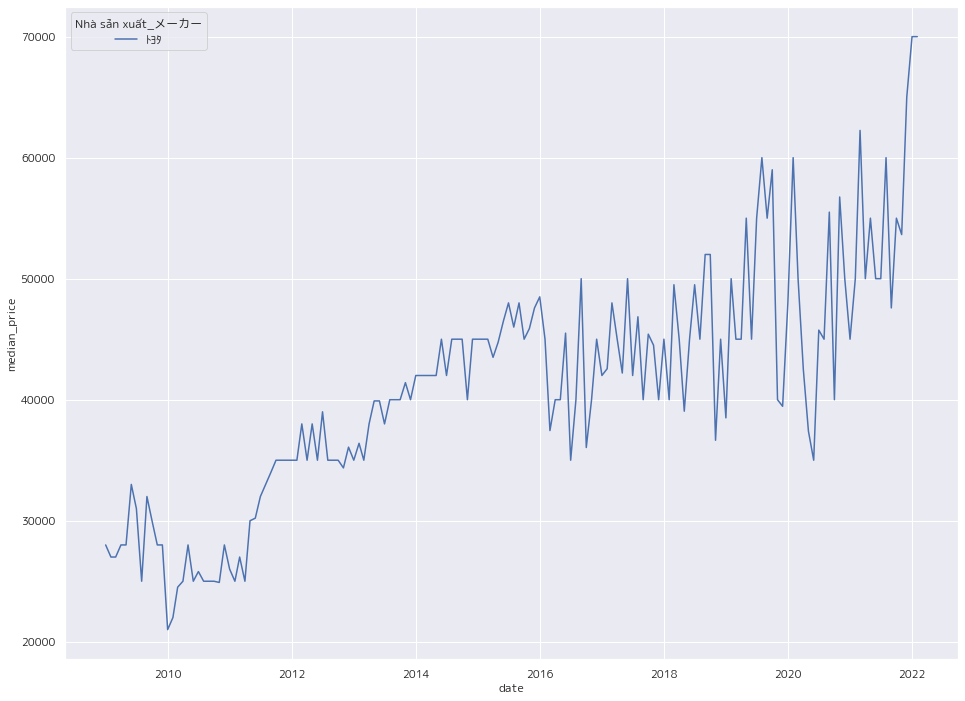

In [164]:
plt.figure(figsize=(16,12))
sns.lineplot(x = 'date', y = 'median_price', hue = 'Nhà sản xuất_メーカー', data = group_best_comp_by_price)

Tên phụ tùng_商品名 3
Model xe_車輌型式 814
Engine model_エンジン型式 222
Tên xe_車名 196
Nhà sản xuất_メーカー 1
Quốc gia_国 52


In [166]:
train, test = df_best_comp[df_best_comp['Năm bán hàng_売上年'] < 2021], df_best_comp[df_best_comp['Năm bán hàng_売上年'] >= 2021 ]

X_train, y_train = train.drop(columns=['Đơn giá bán hàng_売上単価']), train['Đơn giá bán hàng_売上単価']
X_test, y_test =  test.drop(columns=['Đơn giá bán hàng_売上単価']), test['Đơn giá bán hàng_売上単価']

print("Shape X train: ", X_train.shape)
print("Shape X test: ", X_test.shape)


Shape X train:  (110277, 15)
Shape X test:  (6626, 15)


In [167]:
rmse = []
mape = []
r_squared = []
y_train_ground_truth  = []
for  model,name in zip(models,names):
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_train_ground_truth = y_pred_train
#     print(y_pred)
    rmse_score = mean_squared_error(y_test, y_pred,squared=False)
    mape_score = np.mean(np.abs((y_test - y_pred)/y_test)*100)
    mape_score_train = np.mean(np.abs((y_train - y_pred_train)/y_train)*100)
    
#     mape_score = mean_absolute_percentage_error(y_test,y_pred)
    print("Model Name: ", name)
    print("Test MAPE: ",mape_score)
    print("Train MAPE: ",mape_score_train)
    print("\n")
#     print(rmse_score)
    r_squared_score  = model.score(X_test,y_test)
    r_squared.append(r_squared_score)
    rmse.append(rmse_score)
    mape.append(mape_score)
    

Model Name:  Extra_Trees
Test MAPE:  29.763638941761734
Train MAPE:  5.172601439066806


Model Name:  Random_Forest
Test MAPE:  31.650327944386145
Train MAPE:  7.443763571576804




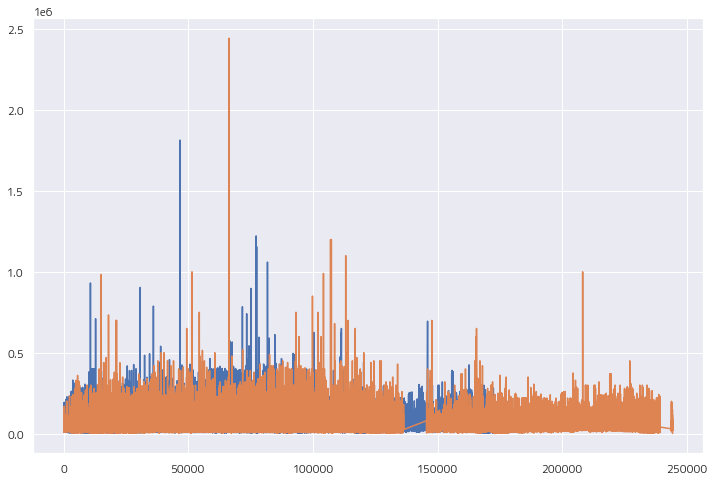

In [154]:
plt.figure(figsize=(12,8))
plt.plot(y_train_ground_truth, label = 'y_pred_train')
plt.plot(y_train, label = 'y_train')

# Group by Quốc gia_国

In [175]:
group_count_by_country = df_best_feature.groupby(['Quốc gia_国'])['Đơn giá bán hàng_売上単価'].count().reset_index(name ='count').sort_values(by=['count'],ascending = False)
group_count_by_country

,Quốc gia_国,count
49,ロシア,58461
2,アラブ首長国連邦,45090
42,ボリビア,27006
26,チリ,19882
34,バングラデシュ,13378
51,南アフリカ,9726
52,日本,9183
1,アメリカ合衆国,8216
44,マレーシア,8175
27,トリニダード・トバゴ,6338


In [183]:
list_best_country = ['ロシア','アラブ首長国連邦']

<AxesSubplot:xlabel='Năm bán hàng_売上年', ylabel='Đơn giá bán hàng_売上単価'>

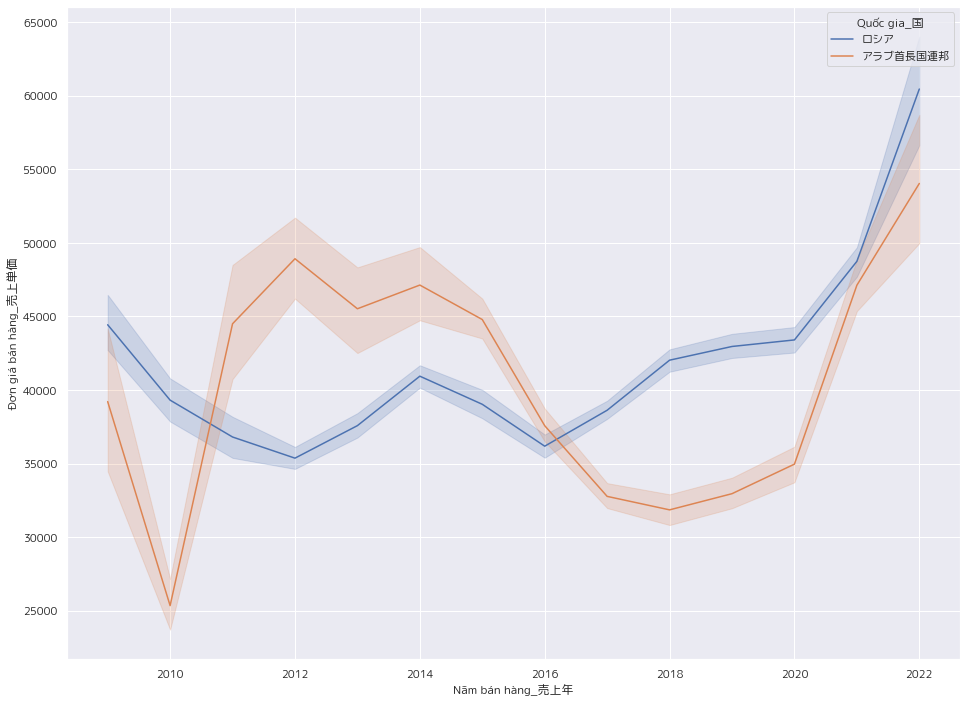

In [184]:
plt.figure(figsize=(16,12))
sns.lineplot(x='Năm bán hàng_売上年', y='Đơn giá bán hàng_売上単価', hue = 'Quốc gia_国', data = df_best_acc[df_best_acc['Quốc gia_国'].isin(list_best_country)])

In [185]:
df_best_country =  df_best_feature[df_best_feature['Quốc gia_国'].isin(list_best_country)]
df_best_country

,Tên phụ tùng_商品名,Model xe_車輌型式,Engine model_エンジン型式,Tên xe_車名,Nhà sản xuất_メーカー,Đơn giá bán hàng_売上単価,Quốc gia_国,Tháng bán hàng_売上月,mean_in_price,median_in_price,Iron,Harness,Alumi,New_York_Gas_Price,US_Gulf_Gas_Price,Năm bán hàng_売上年
0,エンジン,NaN,3C-TE,NaN,ﾄﾖﾀ,35000.0,ロシア,2,NaN,NaN,21.0,235.0,150.0,2.040,2.014,2010
8,エンジン,NaN,3C-TE,NaN,ﾄﾖﾀ,32000.0,ロシア,7,NaN,NaN,19.0,187.0,100.0,1.906,1.889,2009
12,エンジン,NaN,UC,NaN,ﾏﾂﾀﾞ,25000.0,ロシア,6,NaN,NaN,19.0,180.0,90.0,1.689,1.657,2009
36,エンジン,NaN,PN,NaN,ﾏﾂﾀﾞ,25000.0,ロシア,12,NaN,NaN,20.5,217.0,135.0,1.983,1.926,2009
37,エンジン,NaN,LD20II-T,NaN,ﾆｯｻﾝ,35000.0,ロシア,11,NaN,NaN,25.0,217.0,140.0,1.924,1.885,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244301,エンジン,NaN,5E-FE,NaN,ﾄﾖﾀ,28000.0,ロシア,4,NaN,NaN,17.0,110.0,70.0,1.288,1.288,2009
244304,エンジン,NaN,1G-FE,NaN,ﾄﾖﾀ,32000.0,ロシア,4,NaN,NaN,17.0,110.0,70.0,1.288,1.288,2009
244305,エンジン,NaN,1G-FE,NaN,ﾄﾖﾀ,32000.0,ロシア,4,NaN,NaN,17.0,110.0,70.0,1.288,1.288,2009
244306,エンジン,NaN,3S-FE,NaN,ﾄﾖﾀ,30000.0,ロシア,4,NaN,NaN,17.0,110.0,70.0,1.288,1.288,2009


In [186]:
for col in df_best_country.columns[df_best_country.dtypes == object]:
    print(col, df_best_country[col].nunique())
    df_best_country[col] = df_best_country[col].fillna("unknown")
    df_best_country[col] = le.fit_transform(df_best_country[col].values)

for col in df_best_country.columns[df_best_country.dtypes == 'float64']:
#     df_best_feature.fillna(df_best_feature[col].mean(), inplace=True)
      df_best_country.fillna(0, inplace=True)

Tên phụ tùng_商品名 3
Model xe_車輌型式 2905
Engine model_エンジン型式 1108
Tên xe_車名 736
Nhà sản xuất_メーカー 37
Quốc gia_国 2


In [187]:
train, test = df_best_country[df_best_country['Năm bán hàng_売上年'] < 2021], df_best_country[df_best_country['Năm bán hàng_売上年'] >= 2021 ]

X_train, y_train = train.drop(columns=['Đơn giá bán hàng_売上単価']), train['Đơn giá bán hàng_売上単価']
X_test, y_test =  test.drop(columns=['Đơn giá bán hàng_売上単価']), test['Đơn giá bán hàng_売上単価']

print("Shape X train: ", X_train.shape)
print("Shape X test: ", X_test.shape)

Shape X train:  (94450, 15)
Shape X test:  (9101, 15)


In [188]:
rmse = []
mape = []
r_squared = []
y_train_ground_truth  = []
for  model,name in zip(models,names):
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_train_ground_truth = y_pred_train
#     print(y_pred)
    rmse_score = mean_squared_error(y_test, y_pred,squared=False)
    mape_score = np.mean(np.abs((y_test - y_pred)/y_test)*100)
    mape_score_train = np.mean(np.abs((y_train - y_pred_train)/y_train)*100)
    
#     mape_score = mean_absolute_percentage_error(y_test,y_pred)
    print("Model Name: ", name)
    print("Test MAPE: ",mape_score)
    print("Train MAPE: ",mape_score_train)
    print("\n")
#     print(rmse_score)
    r_squared_score  = model.score(X_test,y_test)
    r_squared.append(r_squared_score)
    rmse.append(rmse_score)
    mape.append(mape_score)

Model Name:  Extra_Trees
Test MAPE:  31.984413478163056
Train MAPE:  5.276538571991884


Model Name:  Random_Forest
Test MAPE:  33.047167317743536
Train MAPE:  9.10957628845952




# Group By Engine model_エンジン型式

In [191]:
group_count_engine = df_best_feature.groupby(['Engine model_エンジン型式'])['Đơn giá bán hàng_売上単価'].count().reset_index(name ='count').sort_values(by=['count'], ascending = False)
group_count_best_engine  = group_count_engine[group_count_engine['count'] > 1000]
group_count_best_engine


,Engine model_エンジン型式,count
103,1NZ-FE,12509
245,3S-FE,11526
317,4E-FE,10134
395,5A-FE,6978
400,5E-FE,6515
70,1AZ-FSE,6467
189,2NZ-FE,6167
1160,QG15DE,5607
271,4A-FE,4241
1164,QR20DE,3982


In [194]:
list_best_engine = ['1NZ-FE','3S-FE','4E-FE','5A-FE','5E-FE']

<AxesSubplot:xlabel='Năm bán hàng_売上年', ylabel='Đơn giá bán hàng_売上単価'>

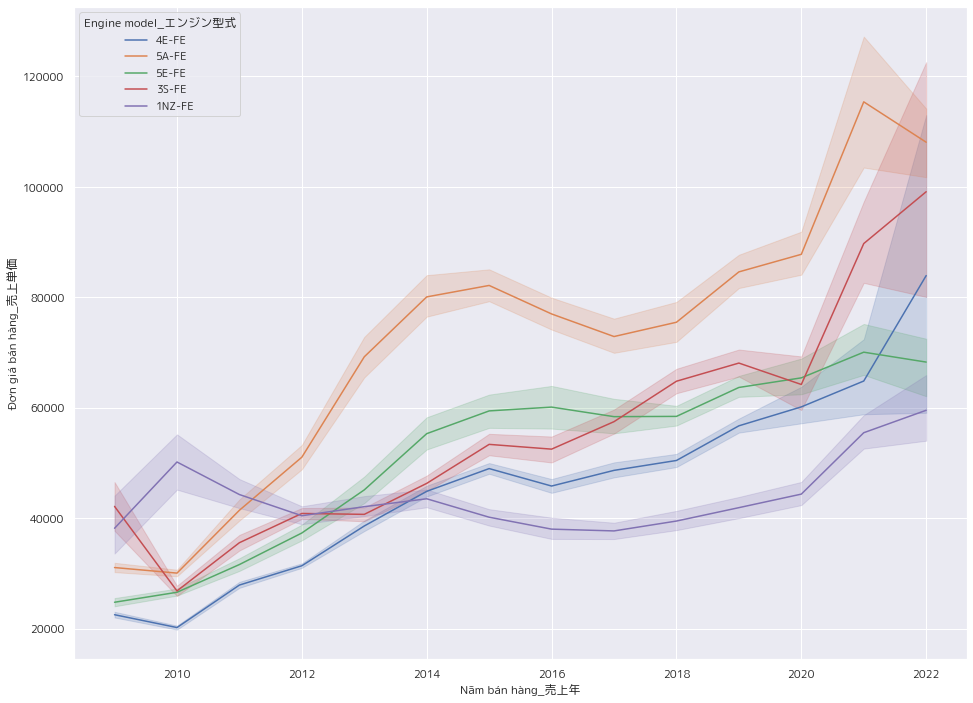

In [195]:
plt.figure(figsize=(16,12))
sns.lineplot(x='Năm bán hàng_売上年', y='Đơn giá bán hàng_売上単価', hue = 'Engine model_エンジン型式', data = df_best_acc[df_best_acc['Engine model_エンジン型式'].isin(list_best_engine)])

In [196]:
df_best_engine = df_best_feature[df_best_feature['Engine model_エンジン型式'].isin(list_best_engine)]

In [197]:
for col in df_best_engine.columns[df_best_engine.dtypes == object]:
    print(col, df_best_engine[col].nunique())
    df_best_engine[col] = df_best_engine[col].fillna("unknown")
    df_best_engine[col] = le.fit_transform(df_best_engine[col].values)

for col in df_best_engine.columns[df_best_engine.dtypes == 'float64']:
#     df_best_feature.fillna(df_best_feature[col].mean(), inplace=True)
      df_best_engine.fillna(0, inplace=True)

Tên phụ tùng_商品名 3
Model xe_車輌型式 128
Engine model_エンジン型式 5
Tên xe_車名 73
Nhà sản xuất_メーカー 4
Quốc gia_国 48


In [198]:
rmse = []
mape = []
r_squared = []
y_train_ground_truth  = []
for  model,name in zip(models,names):
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_train_ground_truth = y_pred_train
#     print(y_pred)
    rmse_score = mean_squared_error(y_test, y_pred,squared=False)
    mape_score = np.mean(np.abs((y_test - y_pred)/y_test)*100)
    mape_score_train = np.mean(np.abs((y_train - y_pred_train)/y_train)*100)
    
#     mape_score = mean_absolute_percentage_error(y_test,y_pred)
    print("Model Name: ", name)
    print("Test MAPE: ",mape_score)
    print("Train MAPE: ",mape_score_train)
    print("\n")
#     print(rmse_score)
    r_squared_score  = model.score(X_test,y_test)
    r_squared.append(r_squared_score)
    rmse.append(rmse_score)
    mape.append(mape_score)

Model Name:  Extra_Trees
Test MAPE:  31.740610925750516
Train MAPE:  5.276507583447384


Model Name:  Random_Forest
Test MAPE:  34.044424081328074
Train MAPE:  9.100220403813953




In [208]:
list_numeric = []
for col in df.columns[df.dtypes == 'float64']:
#     df_best_feature.fillna(df_best_feature[col].mean(), inplace=True)
#       print(col)
      list_numeric.append(col)
      df_best_engine.fillna(0, inplace=True)
print(list_numeric)

['Mã đích bán hàng_売上先コード', 'Đơn giá bán hàng_売上単価', 'Đơn giá mua_仕入単価', 'Tổng giá nhập_仕入合計', 'Tiền công_工賃', 'Năm sản xuất_年式', 'Phân loại mang đến/đón_持込・引取区分', 'Tình trạng engine_エンジン状態', 'Ngày mua_仕入日', 'Tháng mua hàng_仕入月', 'Năm mua_仕入年', 'Mã nhà cung cấp_仕入先コード']


In [209]:
df_numeric = df[list_numeric]

In [211]:
df_numeric.isnull().sum()

Mã đích bán hàng_売上先コード                0
Đơn giá bán hàng_売上単価                  0
Đơn giá mua_仕入単価                       0
Tổng giá nhập_仕入合計                     0
Tiền công_工賃                           0
Năm sản xuất_年式                   243525
Phân loại mang đến/đón_持込・引取区分    244319
Tình trạng engine_エンジン状態          244319
Ngày mua_仕入日                           2
Tháng mua hàng_仕入月                     2
Năm mua_仕入年                            2
Mã nhà cung cấp_仕入先コード                 3
dtype: int64